# Data Mining Project.  Coded by Dyass Khalid on 04-10-19

### Preprocessing Step

In [2]:
import pandas as pd #pandas library for data frames
import math
import seaborn as sns #library for plotting
import numpy as np #for doing array computations
import matplotlib.pyplot as plt #library for plotting with seaborn

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
from sklearn import tree  #sklearn libray for decision trees
from sklearn.model_selection import cross_val_score
from efficient_apriori import apriori

In [5]:
df = pd.read_csv("Project.csv",low_memory = False,index_col=0) #read the csv file


In [6]:
df2 = pd.read_excel("Dictionary.xlsx") #read the xlsx coding file



In [7]:
df2['Column Name']
def get_cols_sheet(temp_df,col_name):
    """
        Function to get columns of excel sheet file:Dictionary for our project
    """
    name = []
    for values in temp_df[col_name]:
        name.append(values)
    return name


In [8]:
names_dict = get_cols_sheet(df2,'Column Name') #Now the columns which we need are in result_dict

In [9]:
def get_column_names(temp_df):
    """
        function to read column names of project file
        
    """
    names = []
    for ele in temp_df.columns:
        names.append(ele)
    return names


In [10]:
names = get_column_names(df)

In [11]:
print(len(names)) #columns in project are 1235

1234


In [12]:
print(len(names_dict)) #columns in dictionary are 1105. Need to remove the extra data

1105


In [13]:
def deleteCols(temp_df,required,total):
    """
        Function to remove extra columns whose values we dont have
        temp_df is our read data frame from project.csv
        required is our read 1st column from dict.csv
        total is our read 1st row from project.csv
    """
    list_second = ['AA3','AA4','AA5','AA6','AA7','AA8','AA14','AA15']# name of cols in second xlsx sheet
    i = 0
    for values in total:
        if values not in list_second:
            if values not in required:
                if values !='train_id':
                    del temp_df[values]
    return temp_df

In [14]:
df = deleteCols(df,names_dict,names)

In [15]:
df

,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,Gender,DG3,...,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
train_id,,,,,,,,,,,,,,,,,,,,,
0,3,32,3.0,NaN,323011,3854,481,1975,1,3,...,1,1,1,1,1,99.0,99,99,99,99
1,2,26,NaN,8.0,268131,2441,344,1981,1,8,...,3,1,1,3,4,NaN,1,2,2,2
2,1,16,NaN,7.0,167581,754,143,1995,1,3,...,4,1,1,2,2,1.0,2,2,2,2
3,4,44,5.0,NaN,445071,5705,604,1980,1,3,...,2,1,1,4,5,NaN,2,2,99,99
4,4,43,NaN,6.0,436161,5645,592,1958,1,3,...,1,2,4,4,4,NaN,1,1,1,1
5,3,35,NaN,8.0,358081,3319,409,1976,0,3,...,3,1,1,5,5,4.0,2,1,1,1
6,3,35,NaN,7.0,357091,3247,401,1998,0,1,...,3,1,1,1,1,4.0,4,4,4,4
7,4,41,4.0,NaN,414021,4459,535,1991,0,3,...,2,1,1,4,4,3.0,3,3,3,3
8,1,16,2.0,NaN,162011,890,175,1958,0,5,...,1,4,3,1,1,1.0,1,2,2,1


In [16]:
df.isnull().sum().sum()

13165763

In [17]:
#removing the columns whose mean is equal to 1
for values in df.columns[df.isnull().mean() == 1]:
    del df[values]   

In [18]:
df.isnull().sum().sum()

12545093

In [19]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [20]:
df.isnull().sum().sum()

0

In [21]:
def updown(temp_df):
    """
        Criteria for scaling the value up or down:
            If the value of the column is greater than or equal to x.5 then we will ciel the values
            Otherwise we will floor the values
    """
    i = 0
    for columns in temp_df:
        if i == 1:
            pass
        else:
          
            for values in df[columns]:
                if type(values) == float:
                    values = round(values)
                
                
updown(df)

In [22]:
df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)

,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,Gender,DG3,...,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
train_id,,,,,,,,,,,,,,,,,,,,,
0,3,32,3.0,6.0,323011,3854,481,1975,1,3,...,1,1,1,1,1,99.0,99,99,99,99
1,2,26,3.0,8.0,268131,2441,344,1981,1,8,...,3,1,1,3,4,1.0,1,2,2,2
2,1,16,3.0,7.0,167581,754,143,1995,1,3,...,4,1,1,2,2,1.0,2,2,2,2
3,4,44,5.0,6.0,445071,5705,604,1980,1,3,...,2,1,1,4,5,1.0,2,2,99,99
4,4,43,3.0,6.0,436161,5645,592,1958,1,3,...,1,2,4,4,4,1.0,1,1,1,1
5,3,35,3.0,8.0,358081,3319,409,1976,0,3,...,3,1,1,5,5,4.0,2,1,1,1
6,3,35,3.0,7.0,357091,3247,401,1998,0,1,...,3,1,1,1,1,4.0,4,4,4,4
7,4,41,4.0,6.0,414021,4459,535,1991,0,3,...,2,1,1,4,4,3.0,3,3,3,3
8,1,16,2.0,6.0,162011,890,175,1958,0,5,...,1,4,3,1,1,1.0,1,2,2,1


In [23]:
file_name = "processed1.csv" #file name for the processed data #mode only

In [24]:
df.to_csv(file_name,encoding='utf-8') #put the data fram back to csv/ file

In [25]:
y = df['Gender']  #Seperated the gender

In [26]:
x = df.drop(df.columns[df.columns.str.contains('Gender',case = False)],axis = 1) #Drop the gender from the data set

In [27]:
x = df.drop(df.columns[df.columns.str.contains('train_id',case = False)],axis = 1) #drop the train_id from the data set

In [28]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state = 2) #split the training and testing data set

### Data Modelling Starts

In [30]:
#Task 2.1

In [31]:
x = df.values
y = y.values

### Linear Regression Model

In [33]:
linear_model = LinearRegression()

In [34]:
yTrain

array([0, 1, 1, ..., 1, 1, 0], dtype=int64)

In [35]:
linear_model.fit(xTrain,yTrain,)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [36]:
linear_model.score(xTrain,yTrain)

1.0

In [37]:
linear_model.score(xTest,yTest)

1.0

In [38]:
accuracy = linear_model.score(xTest,yTest)

In [39]:
accuracy #

1.0

In [196]:
from sklearn.metrics import mean_squared_error, r2_score

In [197]:
print('Coefficients: \n', reduced_model1.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(xTest1, yTest1))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yTest1, ypred))



Coefficients: 
 [-1.60165808e-07]
Mean squared error: 94348088926.54
Variance score: -0.00


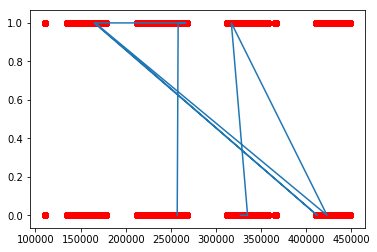

In [227]:
# Plot outputs
plt.scatter(xTrain1, yTrain1,  color='red')
#plt.plot(xTrain1, yTrain1, color='green', marker='o', linestyle='dashed',
#linewidth=2, markersize=12)
plt.plot(xTrain1[0:10],yTrain1[0:10])

#change value of 6 to see how the function is predicting the line
#blue lines are the predicted for different models
#red are the data points for that variable
plt.show()

### Task 2.2 Decision Trees

In [39]:
###########################################################################################################################

In [40]:
classifier = tree.DecisionTreeClassifier(criterion='entropy') #Decision tree class instance

In [41]:
classifier.fit(xTrain,yTrain)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [42]:
classifier.score(xTrain,yTrain)

1.0

In [43]:
classifier.score(xTest,yTest)

1.0

### Task 2.3 on a separate Notebook

### TASK 2.5 Feature Selection using L1 regularization

In [55]:
linear_model2 = linear_model.Lasso(alpha=0.01)  #L1 Regularization 
#Lasso(L1) shrinks the less important feature’s coefficient to zero thus, removing some feature altogether. 
#So, this works well for feature selection in case we have a huge number of features.

In [56]:
linear_model2.fit(xTrain,yTrain)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [57]:
accuracy = linear_model2.score(xTrain,yTrain)#clearly this model is not overfitting.

In [58]:
accuracy

0.9981756210143089

In [61]:
accuracy = linear_model2.score(xTest,yTest) #This alpha is slightly reduced due to model being overfitting here

In [62]:
accuracy

0.998129820876364

### Task 2.4 Correlation Matrix Generation for whole data set

In [64]:
#Calculte the correlation matrix and then plot it as heat map. Heat map is not included in the orignal asked task so it can be treated as bonus

In [65]:
corr = df.corr()

In [66]:
corr

,AA3,AA4,AA5,AA6,AA7,AA14,AA15,DG1,Gender,DG3,...,LN1B,LN2_1,LN2_2,LN2_3,LN2_4,GN1,GN2,GN3,GN4,GN5
AA3,1.000000,0.925447,-0.005902,-0.114678,0.924611,0.117725,0.958523,-0.070281,-0.008179,0.018889,...,-0.079768,0.049245,0.053422,0.060630,0.063183,0.022775,0.048947,0.049809,0.031502,0.031291
AA4,0.925447,1.000000,0.012762,-0.090386,0.999793,0.084883,0.889837,-0.068858,-0.028591,0.031169,...,-0.084329,0.061542,0.063216,0.050255,0.049743,0.015705,0.046940,0.054093,0.043527,0.044589
AA5,-0.005902,0.012762,1.000000,-0.042032,0.018902,-0.505351,-0.007074,-0.003111,0.006411,-0.001953,...,0.055592,-0.065424,-0.067240,-0.074488,-0.069536,0.019871,0.022697,0.020120,0.014895,0.015104
AA6,-0.114678,-0.090386,-0.042032,1.000000,-0.076125,-0.184570,-0.090639,-0.008716,-0.007769,0.034782,...,0.085558,-0.121544,-0.123206,-0.089088,-0.093811,0.010549,0.024849,0.015629,0.022122,0.025948
AA7,0.924611,0.999793,0.018902,-0.076125,1.000000,0.074603,0.889307,-0.069531,-0.028565,0.031779,...,-0.081114,0.057108,0.058756,0.046732,0.046441,0.015951,0.047191,0.054024,0.043489,0.044553
AA14,0.117725,0.084883,-0.505351,-0.184570,0.074603,1.000000,0.131857,0.014166,-0.000338,0.004824,...,-0.095498,0.139811,0.142444,0.128753,0.129005,-0.025010,-0.007293,-0.000146,-0.004038,-0.005680
AA15,0.958523,0.889837,-0.007074,-0.090639,0.889307,0.131857,1.000000,-0.067746,-0.000432,0.011747,...,-0.098245,0.050606,0.056100,0.088676,0.101423,0.017429,0.042819,0.041620,0.024165,0.022936
DG1,-0.070281,-0.068858,-0.003111,-0.008716,-0.069531,0.014166,-0.067746,1.000000,0.067827,-0.040159,...,-0.203573,0.232229,0.238173,0.186134,0.174095,-0.037318,-0.036997,-0.028059,-0.033726,-0.025619
Gender,-0.008179,-0.028591,0.006411,-0.007769,-0.028565,-0.000338,-0.000432,0.067827,1.000000,-0.008646,...,0.165073,-0.138924,-0.137520,-0.117376,-0.106413,0.016402,0.021997,0.022552,0.019375,0.027117
DG3,0.018889,0.031169,-0.001953,0.034782,0.031779,0.004824,0.011747,-0.040159,-0.008646,1.000000,...,0.048740,-0.043356,-0.042672,-0.068006,-0.057339,0.025482,0.269473,0.246047,0.214297,0.209442


In [3]:
#for better visualization

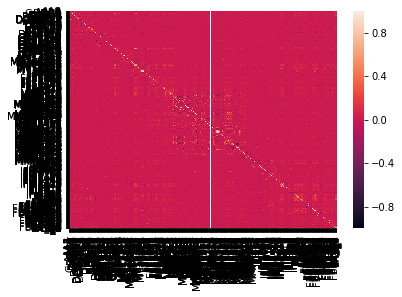

In [67]:
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Optimization Technique for model: L2 regularization

In [68]:
 #2.6 Optimization Technique

In [69]:
linear_model3 = linear_model.Ridge(alpha=0.1) #L2 Regularization #Mohib if you are reading this look on internet
#about L2 and wr


In [70]:
linear_model3.fit(xTrain,yTrain)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [71]:
accuracy = linear_model3.score(xTrain,yTrain)

In [72]:
accuracy

0.99999999832826

In [73]:
accuracy = linear_model3.score(xTest,yTest)

In [74]:
accuracy

0.9999999939605437

### Bonus Task Number 1: Logistic Regression

In [ ]:
###BONUS TASK using the same data generated above

In [84]:
logistic_model = LogisticRegression(solver='liblinear',max_iter=1000) #initialize the logistic model
#solver is the algorithm
#max_iter is the number of iterations the default is 1000

In [85]:
clf = logistic_model.fit(xTrain, yTrain);

In [86]:
accuracy = logistic_model.score(xTrain,yTrain)

In [87]:
accuracy

0.9847986852917009

In [88]:
y_predictions = logistic_model.predict(xTest)
mse = mean_squared_error(yTest, y_predictions)
rmse = math.sqrt(mse)

print('RMSE: {}'.format(rmse))

RMSE: 0.1480263658438443


In [89]:
accuracy = logistic_model.score(xTest,yTest)

In [90]:
accuracy

0.9780881950150644

### Bonus Task Number 2: K means clustering on k = 2 k = 3 and k = 4

In [91]:
#Bonus Task 2  K means clustering unsupervised learning algorithm

In [92]:
from sklearn.cluster import KMeans

In [93]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(xTrain)

In [94]:
kmeans.labels_

array([0, 0, 0, ..., 1, 0, 1])

In [98]:
kmeans.score(xTrain,yTrain)

-39296292487635.02

In [99]:
kmeans1 = KMeans(n_clusters=3, random_state=0).fit(xTrain)

In [100]:
kmeans1.score(xTrain,yTrain)

-22088057945246.14

In [101]:
kmeans2 = KMeans(n_clusters=4, random_state=0).fit(xTrain)

In [102]:
kmeans2.score(xTrain,yTrain)

-9799069939612.398

In [103]:
#A larger negative score shows that our data set is not fit for this technique
#The k-means score is an indication of how far the points are from the centroids. In scikit learn, the score is better the closer to zero it is.
#Bad scores will return a large negative number, whereas good scores return close to zero. Generally, you will want to take the absolute value of the output from the scores method for better visualization.

### Bonus Task Number 3: K nearest neighbours 

In [104]:
#Bonus Task 3 K nearest neighbours is a supervised learning algorithm

In [105]:
#K nearest neighbour is a weak classifier as shown from the knn.score on test data.It is the first algorithm
#to use for classification tasks

In [106]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.neighbors import kneighbors_graph

In [107]:
knn = NearestCentroid()

In [108]:
knn.fit(xTrain,yTrain)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [109]:
knn.score(xTest,yTest)

0.5321829635716242

In [110]:
graph = kneighbors_graph(xTrain, 2, mode='connectivity', include_self=True)

In [111]:
graph

<14604x14604 sparse matrix of type '<class 'numpy.float64'>'
	with 29208 stored elements in Compressed Sparse Row format>

### Bonus Task Number 4: Feature Selections using Chi Square Test

In [112]:
#Bonus Task 4 Feature selection using Chi square test

In [113]:
y = df['Gender']

In [114]:
x = df.drop(df.columns[df.columns.str.contains('Gender',case = False)],axis = 1) #Drop the gender from the data set

In [31]:
x_new = SelectKBest(chi2, k=5).fit_transform(x, y)

In [116]:
y = y.values

In [117]:
x_new

array([[323011.],
       [268131.],
       [167581.],
       ...,
       [346191.],
       [146041.],
       [166161.]])

### Bonus Task Number 5: Deep Neural Net  with Dropout 

In [118]:
#Now using it for Bonus Task #5

In [119]:
#Bonus Task 5

In [41]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout

Using TensorFlow backend.


In [42]:
model = Sequential([
    Dense(300, input_shape=(1045,)),
    Dense(300),
    Dense(300),
    Dense(300),
    Dense(300),
    Dense(300),
    Activation('relu'),
    Dropout(0.2),
    Dense(1),
    Activation('softmax'),
])

In [43]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [44]:
history = model.fit(xTest, yTest,epochs=20)
#Acc

Epoch 1/20
3651/3651 [==============================] - 4s 1ms/step - loss: 7.4407 - acc: 0.5333
Epoch 2/20
3651/3651 [==============================] - 2s 521us/step - loss: 7.4407 - acc: 0.5333
Epoch 3/20
3651/3651 [==============================] - 2s 495us/step - loss: 7.4407 - acc: 0.5333
Epoch 4/20
3651/3651 [==============================] - 2s 580us/step - loss: 7.4407 - acc: 0.5333
Epoch 5/20
3651/3651 [==============================] - 2s 541us/step - loss: 7.4407 - acc: 0.5333
Epoch 6/20
3651/3651 [==============================] - 2s 509us/step - loss: 7.4407 - acc: 0.5333
Epoch 7/20
3651/3651 [==============================] - 2s 491us/step - loss: 7.4407 - acc: 0.5333
Epoch 8/20
3651/3651 [==============================] - 2s 480us/step - loss: 7.4407 - acc: 0.5333
Epoch 9/20
3651/3651 [==============================] - 2s 494us/step - loss: 7.4407 - acc: 0.5333
Epoch 10/20
3651/3651 [==============================] - 2s 534us/step - loss: 7.4407 - acc: 0.5333
Epoch 11/20

In [45]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'acc'])


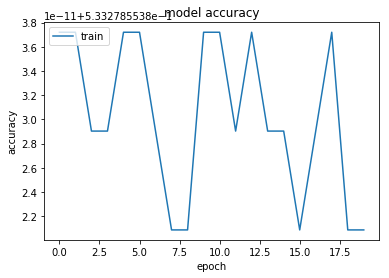

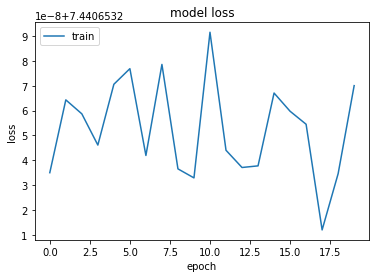

In [46]:

# summarize history for accuracy
plt.plot(history.history['acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Bonus Task Number 6: Random Forest Classifier

In [126]:
#Bonus task 6

In [127]:
from sklearn.ensemble import RandomForestClassifier

In [128]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [129]:
#first we need to do scaling
sc = StandardScaler()  
xTrain = sc.fit_transform(xTrain)  
xTest = sc.transform(xTest)  

In [130]:
classifier = RandomForestClassifier(n_estimators=1045, random_state=0)  
classifier.fit(xTrain, yTrain)  

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1045, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [131]:
classifier.score(xTrain,yTrain)

1.0

In [132]:
classifier.score(xTest,yTest)

0.9928786633798959

In [1]:
#Bonus Task 7: Naive Bayes Classifier

In [6]:
from sklearn.naive_bayes import GaussianNB

In [7]:
gaussian_naive_bayes = GaussianNB() #This calculates posterior probability 

In [33]:
gaussian_naive_bayes.fit(xTrain,yTrain)

GaussianNB(priors=None, var_smoothing=1e-09)

In [34]:
y_pred = gaussian_naive_bayes.predict(xTrain)

In [35]:
gaussian_naive_bayes.score(xTrain,yTrain)

0.5951794029033142

In [36]:
gaussian_naive_bayes.score(xTest,yTest)

0.574637085729937

In [37]:
gaussian_naive_bayes.predict_proba(xTest)

array([[1.02454496e-01, 8.97545504e-01],
       [5.56238557e-16, 1.00000000e+00],
       [9.65703045e-04, 9.99034297e-01],
       ...,
       [1.00000000e+00, 5.03557848e-17],
       [5.95387393e-05, 9.99940461e-01],
       [8.70790208e-03, 9.91292098e-01]])

In [39]:
print("Number of mislabeled points out of a total %d points : %d"
       % (xTrain.shape[0],(yTrain != y_pred).sum()))

Number of mislabeled points out of a total 14604 points : 5912
